# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [364]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

центруем матрицу данных $Z = D - 1 \cdot \mu^T$;

In [3]:
z = x - x.mean(axis=0)

До центрирования:

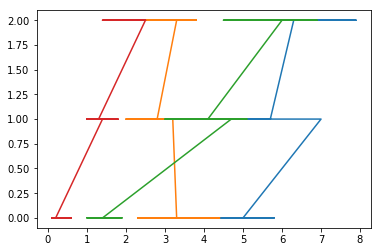

In [4]:
plt.plot(x,y)

После центрирования:

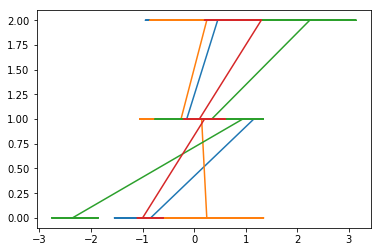

In [5]:
plt.plot(z,y)

вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;

In [41]:
zfeatures=[z[:, i] for i in range(z.shape[1])]
k = np.cov(zfeatures)

вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;

вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;

In [175]:
l,u = np.linalg.eig(k)

выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;

In [48]:
r = 2

In [121]:
uv = np.array([u[:,i] for i in range(r)]).transpose()

вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;

r берем равным 2 в соответствии заданием

In [62]:
fr=l/l.sum()

уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

In [124]:
A = z.dot(uv)

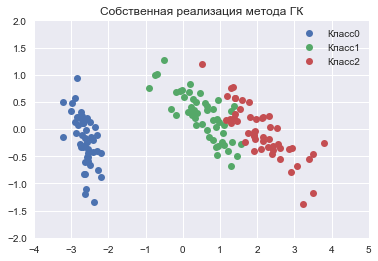

In [134]:
for i in set(y):
        plt.plot(A[y==i, 0], A[y==i, 1],  'o', label='Класс'+str(i))
plt.xlim([-4,5])
plt.ylim([-2,2])
plt.legend()
plt.title('Собственная реализация метода ГК')
plt.show()

Проецируем данные на плоскость образуемую этими векторами, визуализируем полученные результаты c метками классов

Сравниваем реузльтаты с методом PCA из библиотеки sklearn.decomposition.

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca_t = pca.transform(x)

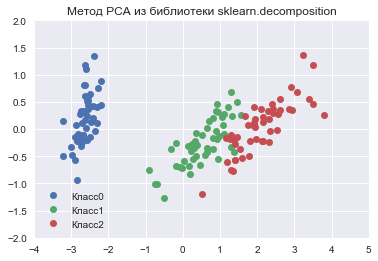

In [135]:
for i in set(y):
        plt.plot(pca_t[y==i, 0], pca_t[y==i, 1],  'o', label='Класс'+str(i))
plt.xlim([-4,5])
plt.ylim([-2,2])
plt.legend()
plt.title('Метод PCA из библиотеки sklearn.decomposition')
plt.show()

Итоговый алгоритм

In [176]:
def pca_kotov(x, r=2):
    
    z = x - x.mean(axis=0)
    
    zfeatures=[z[:, i] for i in range(z.shape[1])]
    
    k = np.cov(zfeatures)
    
    l,u = np.linalg.eig(k)
    
    uv = np.array([u[:,i] for i in range(r)]).transpose()
    
    fr=l/l.sum()
    
    A = z.dot(uv)  
    
    return A, fr

В качестве данных берем изображения с рукописными цифрами

In [167]:
digits = load_digits()
x = digits.data
y = digits.target

In [168]:
transformed, fr = pca_kotov(x, r=2)

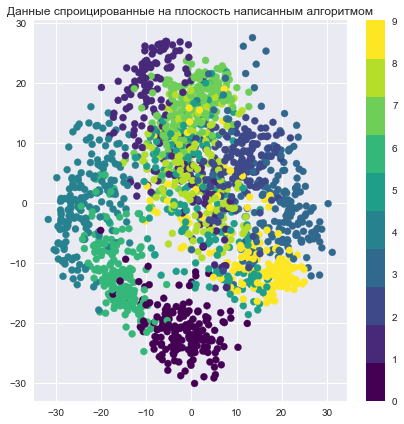

In [192]:
plt.figure(figsize=(7,7))
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar()
plt.title('Собственная реализация метода ГК')

In [195]:
pca_iris = PCA(n_components=2)
iris_transformed = pca_iris.fit_transform(x)

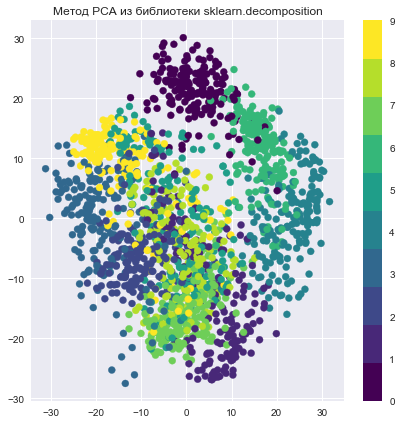

In [196]:
plt.figure(figsize=(7,7))
plt.scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=y, cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar()
plt.title('Метод PCA из библиотеки sklearn.decomposition')

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

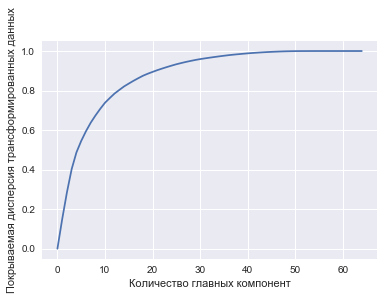

In [209]:
plt.plot(np.cumsum([0]+list(fr)))
plt.xlabel('Количество главных компонент')
plt.ylabel('Покрываемая дисперсия трансформированных данных')
plt.show();

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [375]:
data = load_iris()
x, y = data['data'], data['target']
transformed = pca_kotov(x)[0]
corr=pirson_corr(transformed.T,x.T)

In [420]:
pirsoncorr = np.array([[[i,j,pearsonr(transformed.T[i],x.T[j])[0]] for j in range(len(x.T))] for i in range(len(transformed.T))])

In [485]:
pd_graph = pd.DataFrame()
for component in pirsoncorr:    
    for feature in component:   
        pd_graph = pd_graph.append([[int(feature[0]), int(feature[1]), feature[2]]])

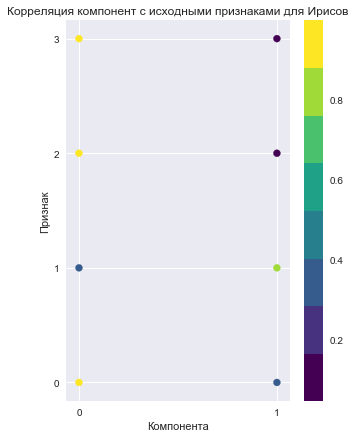

In [537]:
plt.figure(figsize=(5,7))


plt.scatter(pd_graph[0], pd_graph[1], c=abs(pd_graph[2]), cmap=plt.cm.get_cmap('viridis', 8))
plt.xticks([0, 1])
plt.yticks([0, 1, 2, 3])
plt.xlabel('Компонента')
plt.ylabel('Признак')
plt.title('Корреляция компонент с исходными признаками для Ирисов')
plt.colorbar()        

In [531]:
pd_graph[(pd_graph[0]==0)&(pd_graph[2]>0.8)]

,0,1,2
0,0,0,0.897545
0,0,2,0.997854
0,0,3,0.966484


In [530]:
pd_graph[(pd_graph[0]==1)&(abs(pd_graph[2])>0.8)]

,0,1,2
0,1,1,-0.828313


Согласно корреляции Пирсона, в 0 компоненту вошли 0,2 и 3 признаки с коэффициентами 0.89754488, 0.99785405,  0.96648418 соответственно

В 1 компоненту вошел 1 признак с коэффициентом равным -0.82831259

В качестве данных берем изображения с рукописными цифрами

In [497]:
digits = load_digits()
x = digits.data
y = digits.target
transformed = pca_kotov(x)[0]
pirsoncorr_iris = np.array([[[i,j,pearsonr(transformed.T[i],x.T[j])[0]] for j in range(len(x.T))] for i in range(len(transformed.T))])

C:\Users\Vanya\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Vanya\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [498]:
pd_graph_iris = pd.DataFrame()
for component in pirsoncorr_iris:    
    for feature in component:   
        pd_graph_iris = pd_graph_iris.append([[int(feature[0]), int(feature[1]), feature[2]]])

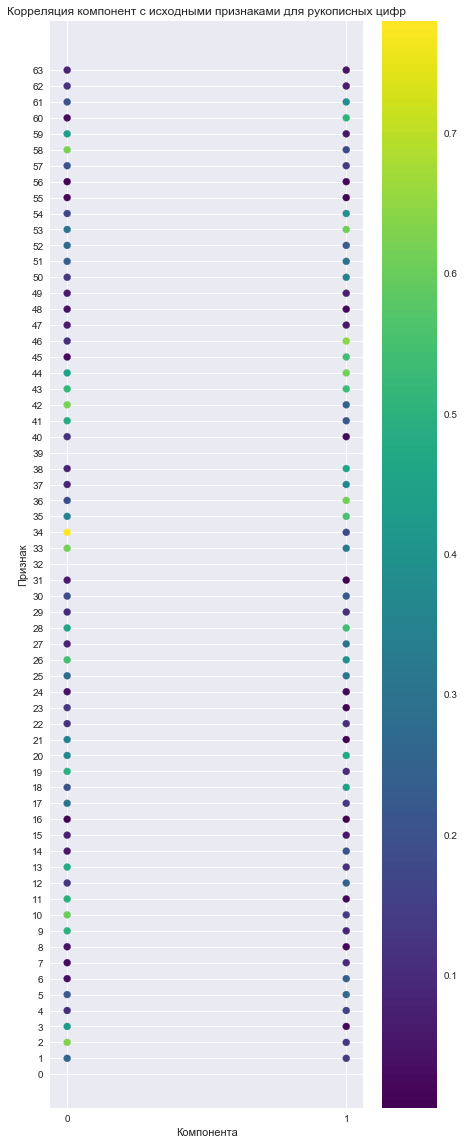

In [538]:
plt.figure(figsize=(7,20))

plt.scatter(pd_graph_iris[0], pd_graph_iris[1], c=abs(pd_graph_iris[2]), cmap=plt.cm.get_cmap('viridis', 128))
plt.xticks([0, 1])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
plt.xlabel('Компонента')
plt.ylabel('Признак')
plt.title('Корреляция компонент с исходными признаками для рукописных цифр')
plt.colorbar()        

In [529]:
pd_graph_iris[(pd_graph_iris[0]==0)&(abs(pd_graph_iris[2])>0.6)]

,0,1,2
0,0,2,0.628694
0,0,10,0.603270
0,0,33,-0.614888
0,0,34,-0.779934
0,0,42,-0.620201
0,0,58,0.617906


In [528]:
pd_graph_iris[(pd_graph_iris[0]==1)&(abs(pd_graph_iris[2])>0.6)]

,0,1,2
0,1,36,0.615215
0,1,44,0.616458
0,1,46,-0.642739
0,1,53,-0.606478


Согласно корреляции Пирсона, в 0 компоненту вошли 2,10,33,34,42 и 58 признаки с коэффициентами 0.62, 0.60,-0.61,-0.77,-0.62, 0.61
соответственно

В 1 компоненту вошли 36, 44, 46 и 53 признаки с коэффициентами 0.61,0.61,-0.64,-0.60 соответственно